### Meet Agrawal - BT19CSE004

### Import Statements

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Que-1

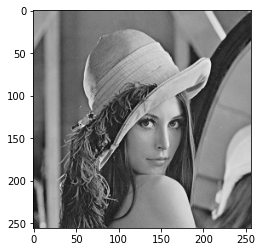

In [10]:
def shrink(img,factor):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # finding dimensions of the new image
    x = int(width/factor)
    y = int(height/factor)
    
    # forming a new image array with all zeros
    newImage = np.zeros((x,y),dtype = 'uint8')
    
    # picking up values in rows and columns at a step of "factor"
    n = 0
    m = 0
    for i in range(0,width,factor):
        for j in range(0,height,factor):
            if(n<x and m<y):
                newImage[n][m] = img[i][j]
            m=m+1
        n=n+1
        m=0
    
    return newImage
    

def zoom(img,factor):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # finding dimensions of the new image
    x = int(width*factor)
    y = int(height*factor)
    
    # forming a new image array with all zeros
    newImage = np.zeros((x,y),dtype = 'uint8')
    
    # for every step or factor size fill the values to the down and right pixel
    n = 0
    m = 0
    for i in range(0,width):
        for j in range(0,height):
            for k in range(factor): 
                for l in range(factor): 
                    if(n+k<x and m+l<y):
                        newImage[n+k][m+l] = img[i][j]
            m=m+factor
        n=n+factor
        m=0
    
    return newImage
 

# read the input image
img = cv2.imread("lena_gray_256.tif",0)

#display actual image
plt.imshow(img,cmap='gray')
plt.show()

# shrink the image
img_shrink = shrink(img,5)

#display image
cv2.imshow('shrink',img_shrink)
cv2.waitKey(0)
cv2.destroyAllWindows()


# zoom the image
img_zoom = zoom(img_shrink,5)

#display image
cv2.imshow('zoom',img_zoom)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Que-2

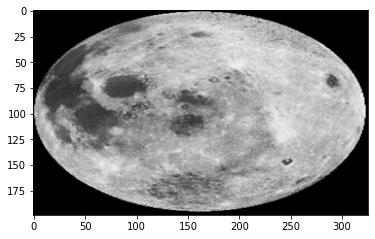

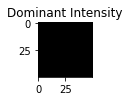

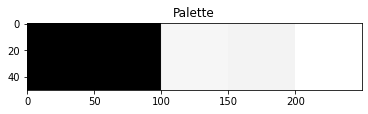

In [6]:
def domIntensity(im, k):
    
    # getting size of image
    width,height=im.shape[:2]
    
    # implemented counting using a dictonary
    histg = {} 
    
    for i in range(width):
        for j in range(height):
            if (im[i][j] in histg):
                histg[im[i][j]] += 1
            else:
                histg[im[i][j]] = 1
    
    # sorting the dictonary based on count values in descending order
    sorted_res = sorted(histg.items(), key = lambda kv:(kv[1], kv[0]),reverse = True)
    
    # appending the dominant "k" intensities to the list of dominant intensities
    dom_intensity = []
    for i in range(1,k):
        dom_intensity.append(sorted_res[i][0])
     
    return dom_intensity


def display(im,dom_intensity):
    
    # display the image
    plt.imshow(im,cmap='gray')
    plt.show()
    
    img_new = np.full((50,50),dom_intensity[0],dtype = 'uint8')
    
    # display the dominant intensity
    plt.figure(figsize=(1,1))
    plt.title('Dominant Intensity')
    plt.imshow(img_new,cmap='gray')
    plt.show()
    
    for i in dom_intensity:
        img = np.full((50,50),i,dtype = 'uint8')
        img_new = np.hstack((img_new,img))
    
    
    #display the palette 
    plt.title('Palette')
    plt.imshow(img_new,cmap='gray')
    plt.show()


# read the image
img = cv2.imread('fullmoon.tiff',0)

# get the list of dominant intensities
dom_intensity = domIntensity(img,5)

# display output in desired format
display(img,dom_intensity)

## Que-3

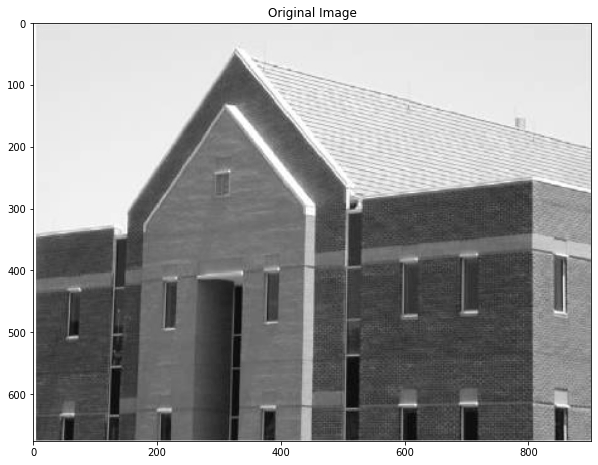

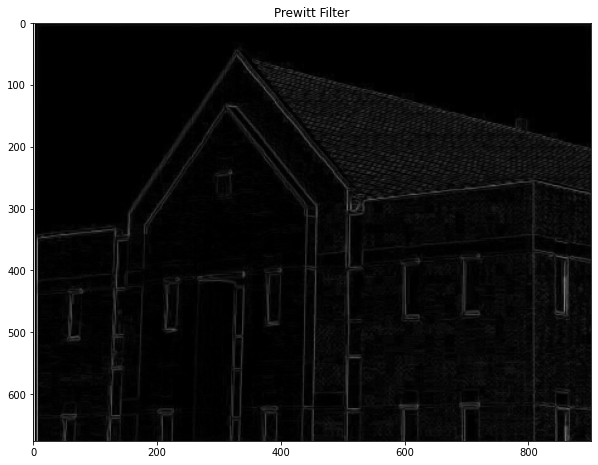

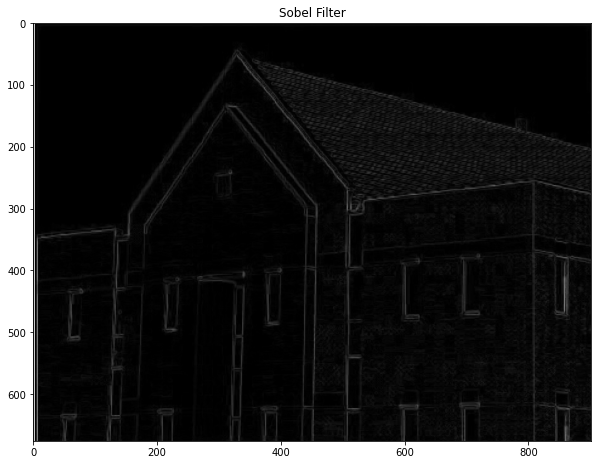

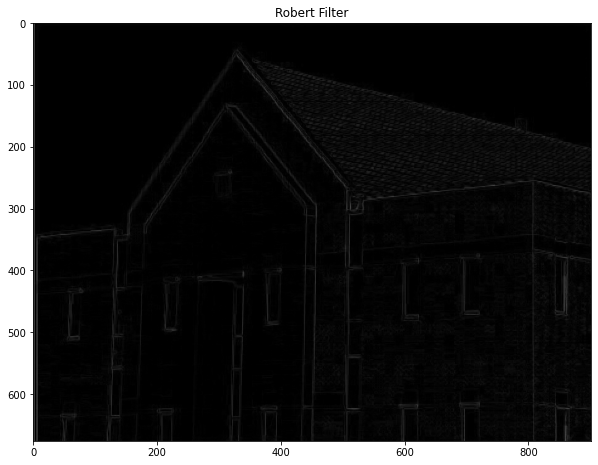

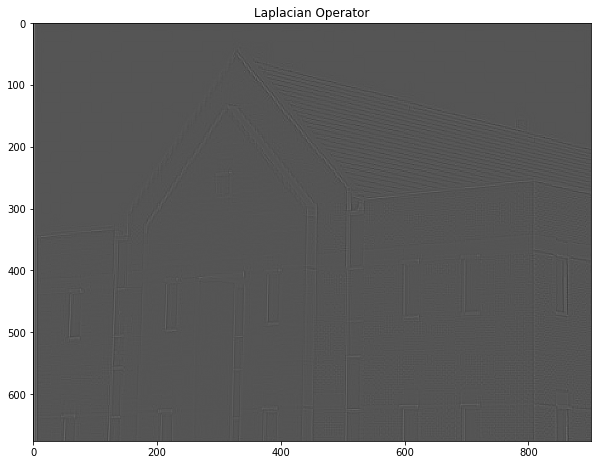

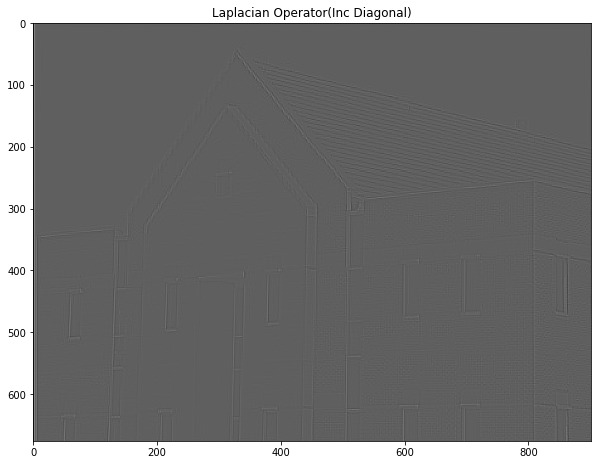

In [6]:
def apply_filter(img,kernel):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # getting size of kernel
    size_x, size_y = kernel.shape[:2]

    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'float32')
    
    # padding the image
    img = np.pad(img, pad_width= ([size_x, ], [size_y, ]),mode= 'constant', constant_values= (0, 0))
        
    for x in range(width): 
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + size_x, y:y + size_y]
            
            # scalar product and calculating the sum
            output_values = np.sum(kernel * window, axis=(0, 1)) 
            
            # placing the value to the output array
            output_array[x, y] = output_values
               
    return output_array


#import the image
i = cv2.imread('Building.jpg',0)

# display image
plt.figure(figsize=(10,10))
plt.title('Original Image')
plt.imshow(i,cmap='gray')
plt.show()




# prewitt filter
prewitt_kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_kernel_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])


i_x = apply_filter(i,prewitt_kernel_x)
i_y = apply_filter(i,prewitt_kernel_y)

prewitt = np.sqrt(i_x**2 + i_y**2)

# scaling the matrix values to be from 0 to 255
prewitt-=np.min(prewitt)
prewitt*=((255.0)/np.max(prewitt))

prewitt = prewitt.astype(np.uint8)


# display image
plt.figure(figsize=(10,10))
plt.title('Prewitt Filter')
plt.imshow(prewitt,cmap='gray')
plt.show()




#sobel filter
sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_kernel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])


i_x = apply_filter(i,sobel_kernel_x)
i_y = apply_filter(i,sobel_kernel_y)

sobel = np.sqrt(i_x**2 + i_y**2)

# scaling the matrix values to be from 0 to 255
sobel-=np.min(sobel)
sobel*=((255.0)/np.max(sobel))

sobel = sobel.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Sobel Filter')
plt.imshow(sobel,cmap='gray')
plt.show()




#robert filter
robert_kernel_x = np.array([[0,1],[-1,0]])
robert_kernel_y = np.array([[1,0],[0,-1]])


i_x = apply_filter(i,robert_kernel_x)
i_y = apply_filter(i,robert_kernel_y)

robert = np.sqrt(i_x**2 + i_y**2)

# scaling the matrix values to be from 0 to 255
robert-=np.min(robert)
robert*=((255.0)/np.max(robert))

robert = robert.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Robert Filter')
plt.imshow(robert,cmap='gray')
plt.show()




# laplacian operator
laplacian_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

img_lap = apply_filter(i,laplacian_kernel)

# scaling the matrix values to be from 0 to 255
img_lap-=np.min(img_lap)
img_lap*=((255.0)/np.max(img_lap))

img_lap = img_lap.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Laplacian Operator')
plt.imshow(img_lap,cmap='gray')
plt.show()




# laplacian operator (including diagonals)
laplacian_diag_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

img_lap_dia = apply_filter(i,laplacian_diag_kernel)

# scaling the image values to be from 0 to 255
img_lap_dia-=np.min(img_lap_dia)
img_lap_dia*=((255.0)/np.max(img_lap_dia))

img_lap_dia = img_lap_dia.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Laplacian Operator(Inc Diagonal)')
plt.imshow(img_lap_dia,cmap='gray')
plt.show()


## Que-4

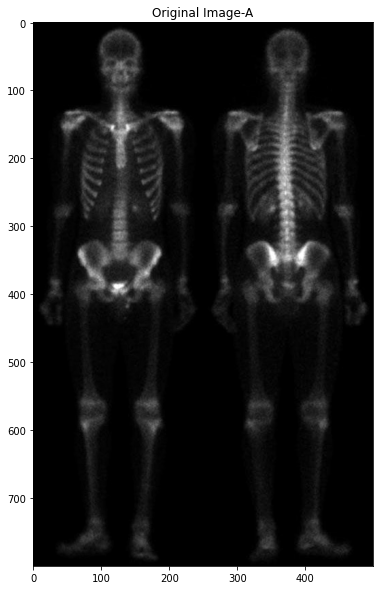

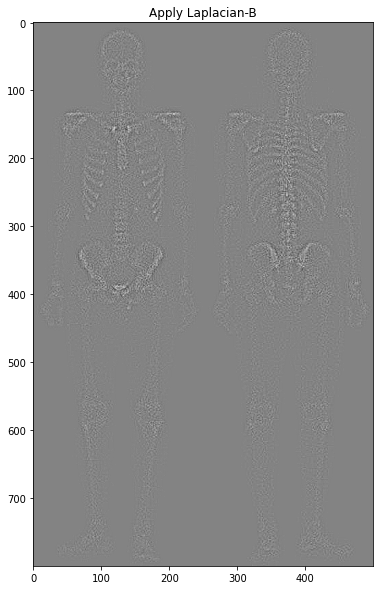

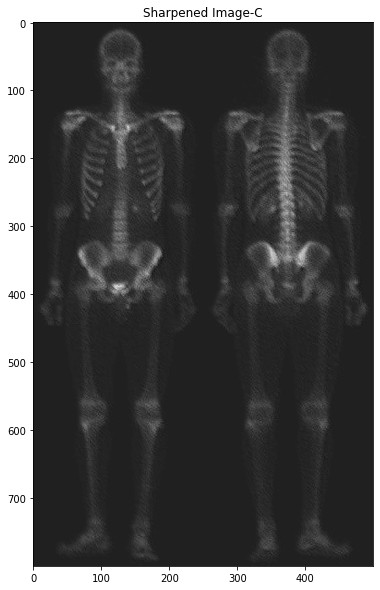

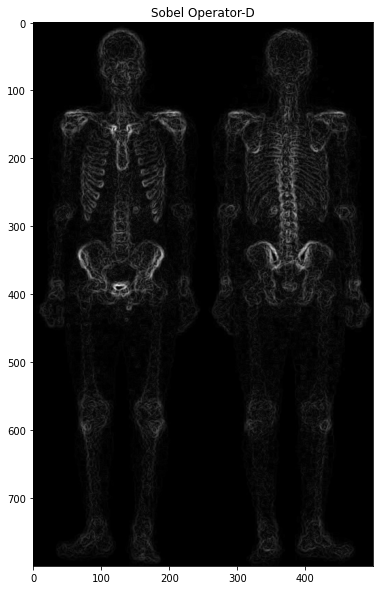

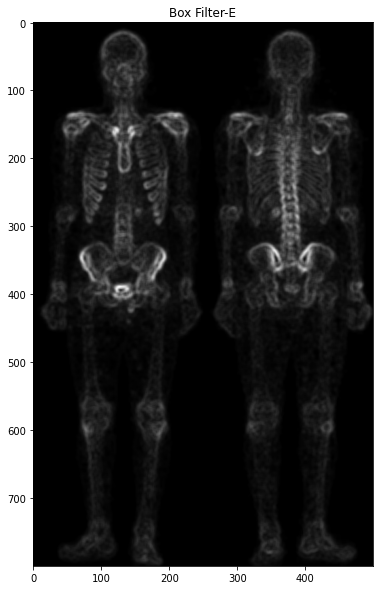

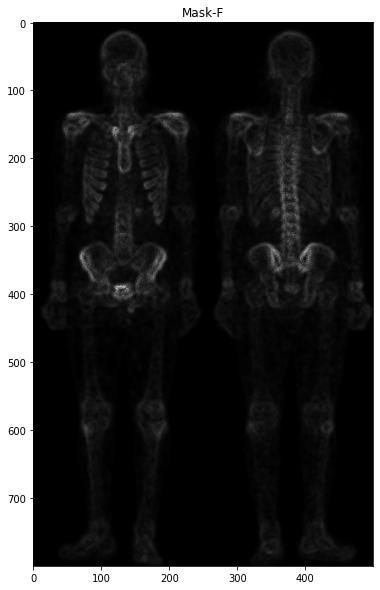

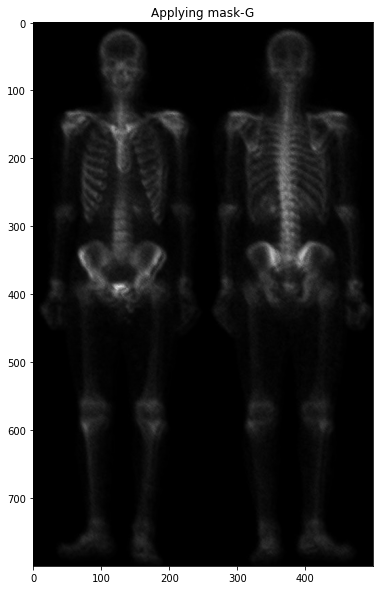

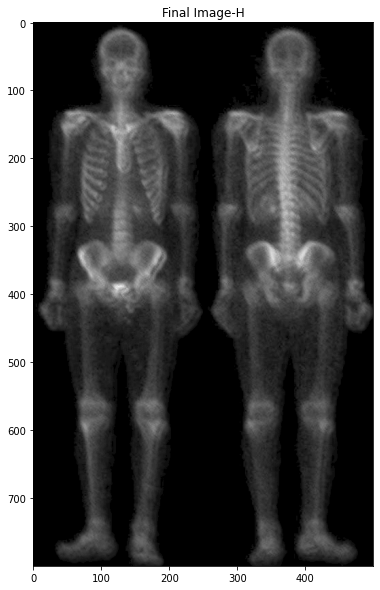

In [17]:
def apply_laplacian(img,kernel):
    
    # getting size of image
    width,height=img.shape[:2]

    # getting size of kernel
    size_x, size_y = kernel.shape[:2]
    
    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'float32')
    
    # padding the image
    img = np.pad(img, pad_width= ([size_x, ], [size_y, ]),mode= 'constant', constant_values= (0, 0))
        
    for x in range(width): 
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + size_x, y:y + size_y]
            
            # scalar product and calculating the sum
            output_values = np.sum(kernel * window, axis=(0, 1)) 
            
            # placing the value to the output array
            output_array[x, y] = output_values
    
    # scaling the matrix values to be from 0 to 255
    output_array-=np.min(output_array)
    output_array*=((255.0)/np.max(output_array))

    output_array = output_array.astype(np.uint8)
            
    return output_array


def apply_sobel(img,kernel):
    
    # getting size of image
    width,height=img.shape[:2]

    # getting size of kernel
    size_x, size_y = kernel.shape[:2]

    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'float32')
    
    # padding the image
    img = np.pad(img, pad_width= ([size_x, ], [size_y, ]),mode= 'constant', constant_values= (0, 0))
        
    for x in range(width): 
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + size_x, y:y + size_y]
            
            # scalar product and calculating the sum
            output_values = np.sum(kernel * window, axis=(0, 1)) 
            
            # placing the value to the output array
            output_array[x, y] = output_values
            
    return output_array


def apply_filter(img,kernel):
    
    # getting size of image
    width,height=img.shape[:2]

    # getting size of kernel
    size_x, size_y = kernel.shape[:2]

    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'float32')
    
    # padding the image
    img = np.pad(img, pad_width= ([size_x, ], [size_y, ]),mode= 'constant', constant_values= (0, 0))
        
    for x in range(width): 
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + size_x, y:y + size_y]

            # scalar product and calculating the sum
            output_values = ((1/(size_x*size_y))*np.sum(kernel * window, axis=(0, 1)))
            
            # placing the value to the output array
            output_array[x, y] = output_values
            
    return output_array


# reading the image
img_a = cv2.imread('skeleton.tif',0)

# display image
plt.figure(figsize=(10,10))
plt.title('Original Image-A')
plt.imshow(img_a,cmap='gray')
plt.show()




# apply laplacian to the image
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
img_b = apply_filter(img_a,kernel)

# scaling the matrix values to be from 0 to 255
img_b-=np.min(img_b)
img_b*=((255.0)/np.max(img_b))

# display image
plt.figure(figsize=(10,10))
plt.title('Apply Laplacian-B')
plt.imshow(img_b,cmap='gray')
plt.show()




# sharpened image
img_c = img_a+img_b

# scaling the matrix values to be from 0 to 255
img_c-=np.min(img_c)
img_c*=((255.0)/np.max(img_c))
img_c = img_c.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Sharpened Image-C')
plt.imshow(img_c,cmap='gray')
plt.show()




#sobel filter
sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_kernel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
i_x = apply_sobel(img_a,sobel_kernel_x)
i_y = apply_sobel(img_a,sobel_kernel_y)
img_d = np.sqrt(i_x**2 + i_y**2)

# scaling the matrix values to be from 0 to 255
img_d-=np.min(img_d)
img_d*=((255.0)/np.max(img_d))

img_d = img_d.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Sobel Operator-D')
plt.imshow(img_d,cmap='gray')
plt.show()




# box filter
kernel = np.ones((5,5), np.uint8)
img_e = apply_filter(img_d,kernel)

# scaling the matrix values to be from 0 to 255
img_e-=np.min(img_e)
img_e*=((255.0)/np.max(img_e))
img_e = img_e.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Box Filter-E')
plt.imshow(img_e,cmap='gray')
plt.show()




# making mask image
img_f = img_b*img_e

# scaling the matrix values to be from 0 to 255
img_f-=np.min(img_f)
img_f*=((255.0)/np.max(img_f))

# display image
plt.figure(figsize=(10,10))
plt.title('Mask-F')
plt.imshow(img_f,cmap='gray')
plt.show()




# applying mask to the image
img_g = img_a+img_f

# scaling the matrix values to be from 0 to 255
img_g-=np.min(img_g)
img_g*=((255.0)/np.max(img_g))
img_g = img_g.astype(np.uint8)

# display image
plt.figure(figsize=(10,10))
plt.title('Applying mask-G')
plt.imshow(img_g,cmap='gray')
plt.show()




# power-law transformation
img_h = np.array(255*np.power(np.abs(img_g) / 255,0.5), dtype = 'uint8') 

# display image
plt.figure(figsize=(10,10))
plt.title('Final Image-H')
plt.imshow(img_h,cmap='gray')
plt.show()

## Que-5

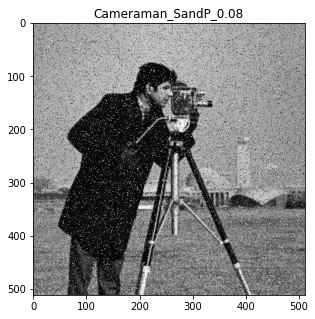

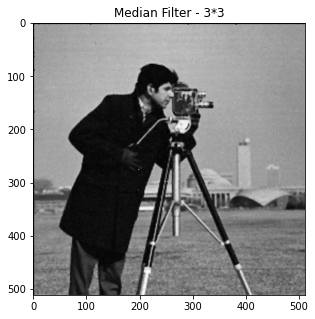

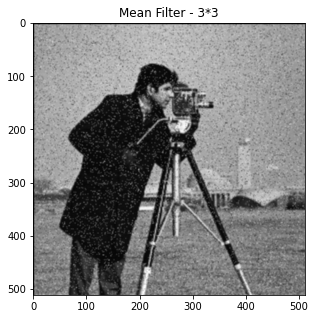

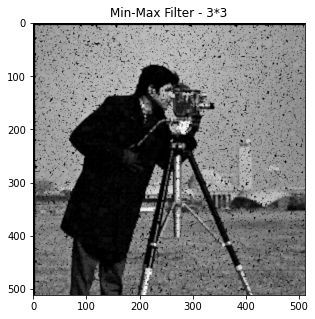

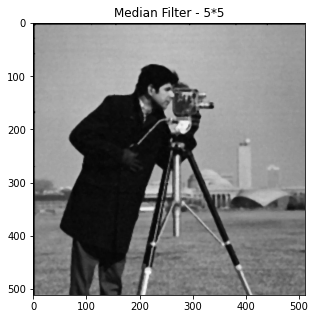

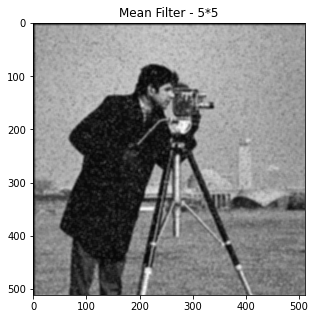

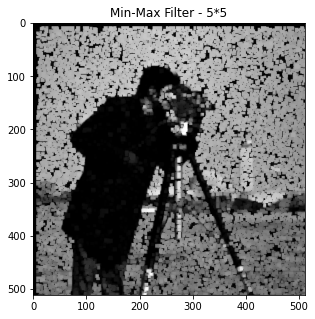

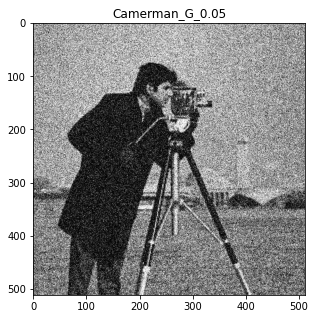

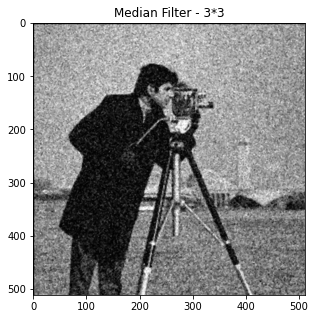

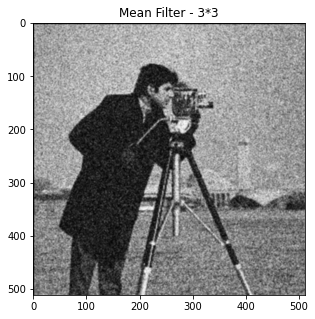

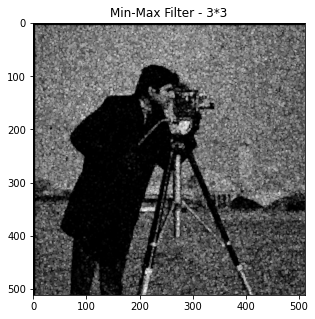

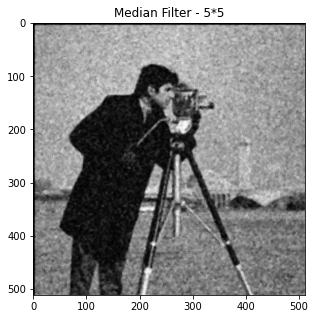

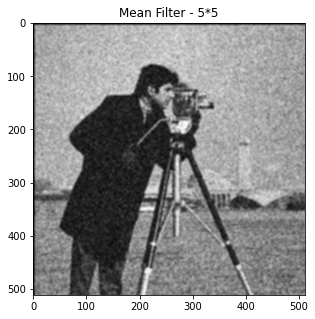

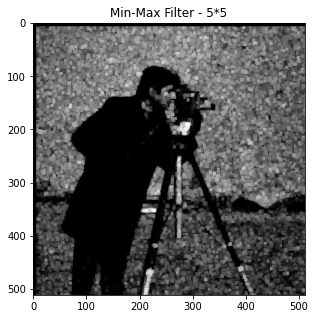

In [15]:
def median_filter(img,filter_size):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # padding the image
    img = np.pad(img, pad_width= ([filter_size, ], [filter_size, ]),mode= 'constant', constant_values= (0, 0))
    
    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'uint8')

    for x in range(width):
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + filter_size, y:y + filter_size]
            
            # finding out the median in the window
            output_value = np.median(window)

            # placing the value to the output array
            output_array[x, y] = output_value
            
    
    return output_array

def mean_filter(img,filter_size):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # padding the image
    img = np.pad(img, pad_width= ([filter_size, ], [filter_size, ]),mode= 'constant', constant_values= (0, 0))
    
    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'uint8')

    for x in range(width):
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + filter_size, y:y + filter_size]
            
            # finding out the mean in the window
            output_value = np.mean(window)

            # placing the value to the output array
            output_array[x, y] = output_value
            
    return output_array


def min_filter(img,filter_size):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # padding the image
    img = np.pad(img, pad_width= ([filter_size, ], [filter_size, ]),mode= 'constant', constant_values= (0, 0))
    
    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'uint8')

    for x in range(width):
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + filter_size, y:y + filter_size]
           
            # finding out the minimum value in the window
            output_value = np.amin(window)

            # placing the value to the output array
            output_array[x, y] = output_value
            
    
    return output_array

def max_filter(img,filter_size):
    
    # getting size of image
    width,height=img.shape[:2]
    
    # padding the image
    img = np.pad(img, pad_width= ([filter_size, ], [filter_size, ]),mode= 'constant', constant_values= (0, 0))
    
    # forming an output array of zeros
    output_array = np.zeros((width,height),dtype = 'uint8')

    for x in range(width):
        for y in range(height):
            
            # capturing a window to apply the filter
            window = img[x:x + filter_size, y:y + filter_size]
            
            # finding out the maximum value in the window
            output_value = np.amax(window)
            
            # placing the value to the output array
            output_array[x, y] = output_value
            
    
    return output_array


# read the image
img_sand = cv2.imread('Cameraman_SandP_0.08.jpg',0)

# display image
plt.figure(figsize=(5,5))
plt.title('Cameraman_SandP_0.08')
plt.imshow(img_sand,cmap='gray')
plt.show()


# 3*3 kernel size
# applying median filter
img1 = median_filter(img_sand,3)

# display image
plt.figure(figsize=(5,5))
plt.title('Median Filter - 3*3')
plt.imshow(img1,cmap='gray')
plt.show()


# applying mean filter
img2 = mean_filter(img_sand,3)

# display image
plt.figure(figsize=(5,5))
plt.title('Mean Filter - 3*3')
plt.imshow(img2,cmap='gray')
plt.show()


# applying min-max filter
img3 = min_filter(img_sand,3)
img4 = max_filter(img3,3)

# display image
plt.figure(figsize=(5,5))
plt.title('Min-Max Filter - 3*3')
plt.imshow(img4,cmap='gray')
plt.show()



# 5*5 kernel size
# applying median filter
img1 = median_filter(img_sand,5)

# display image
plt.figure(figsize=(5,5))
plt.title('Median Filter - 5*5')
plt.imshow(img1,cmap='gray')
plt.show()


# applying mean filter
img2 = mean_filter(img_sand,5)

# display image
plt.figure(figsize=(5,5))
plt.title('Mean Filter - 5*5')
plt.imshow(img2,cmap='gray')
plt.show()


# applying min-max filter
img3 = min_filter(img_sand,5)
img4 = max_filter(img3,5)

# display image
plt.figure(figsize=(5,5))
plt.title('Min-Max Filter - 5*5')
plt.imshow(img4,cmap='gray')
plt.show()




# read the image
img_ga = cv2.imread('Camerman_G_0.05.jpg',0)

# display image
plt.figure(figsize=(5,5))
plt.title('Camerman_G_0.05')
plt.imshow(img_ga,cmap='gray')
plt.show()



# 3*3 kernel size
# applying median filter
img1 = median_filter(img_ga,3)

# display image
plt.figure(figsize=(5,5))
plt.title('Median Filter - 3*3')
plt.imshow(img1,cmap='gray')
plt.show()


# applying mean filter
img2 = mean_filter(img_ga,3)

# display image
plt.figure(figsize=(5,5))
plt.title('Mean Filter - 3*3')
plt.imshow(img2,cmap='gray')
plt.show()


# applying min-max filter
img3 = min_filter(img_ga,3)
img4 = max_filter(img3,3)

# display image
plt.figure(figsize=(5,5))
plt.title('Min-Max Filter - 3*3')
plt.imshow(img4,cmap='gray')
plt.show()



# 5*5 kernel size
# applying median filter
img1 = median_filter(img_ga,5)

# display image
plt.figure(figsize=(5,5))
plt.title('Median Filter - 5*5')
plt.imshow(img1,cmap='gray')
plt.show()


# applying mean filter
img2 = mean_filter(img_ga,5)

# display image
plt.figure(figsize=(5,5))
plt.title('Mean Filter - 5*5')
plt.imshow(img2,cmap='gray')
plt.show()


# applying min-max filter
img3 = min_filter(img_ga,5)
img4 = max_filter(img3,5)

# display image
plt.figure(figsize=(5,5))
plt.title('Min-Max Filter - 5*5')
plt.imshow(img4,cmap='gray')
plt.show()